In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
cars= pd.read_csv('/content/CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## **3.Pre Profiling**

### **3.1 Data information**

In [86]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### **3.2 Data Describtion**

In [87]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [88]:
cars.all()

car_ID               True
symboling           False
CarName              True
fueltype             True
aspiration           True
doornumber           True
carbody              True
drivewheel           True
enginelocation       True
wheelbase            True
carlength            True
carwidth             True
carheight            True
curbweight           True
enginetype           True
cylindernumber       True
enginesize           True
fuelsystem           True
boreratio            True
stroke               True
compressionratio     True
horsepower           True
peakrpm              True
citympg              True
highwaympg           True
price                True
dtype: bool

## **4. A Visual Analysis of Cars Price**

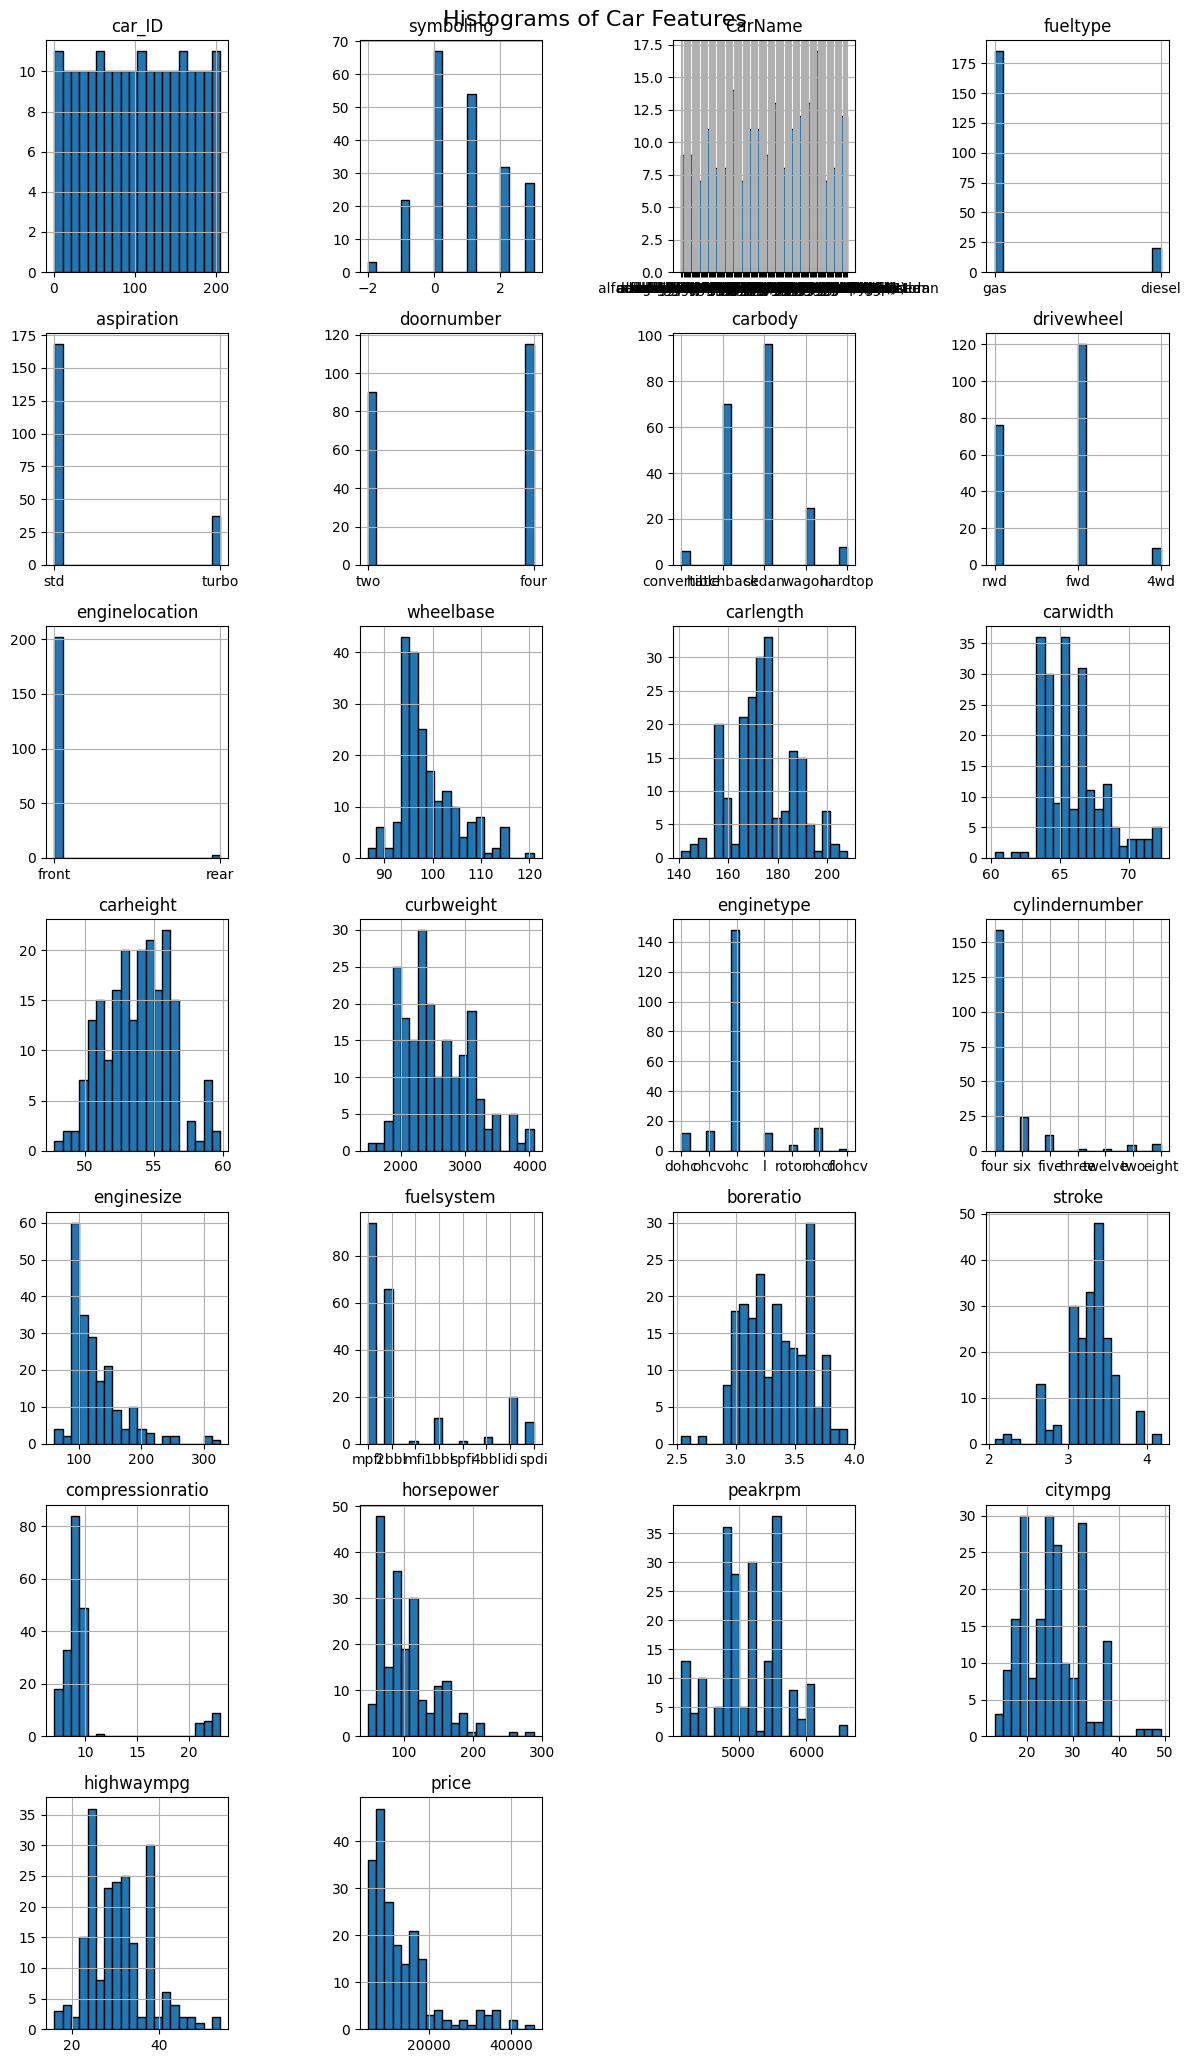

In [89]:
import matplotlib.pyplot as plt

# Assuming 'cars' is a DataFrame and you want to plot histograms for all columns
num_cols = len(cars.columns)
num_rows = (num_cols - 1) // 4 + 1  # Calculate the number of rows based on the number of columns
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(12, num_rows * 3))
fig.suptitle('Histograms of Car Features', fontsize=16)

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Assuming 'cars' is your DataFrame and you want to plot histograms for each column
for i, column in enumerate(cars.columns):
    axes[i].hist(cars[column], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].grid(True)

# Remove empty subplots if there are more subplots than columns
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()




<Figure size 1500x700 with 0 Axes>

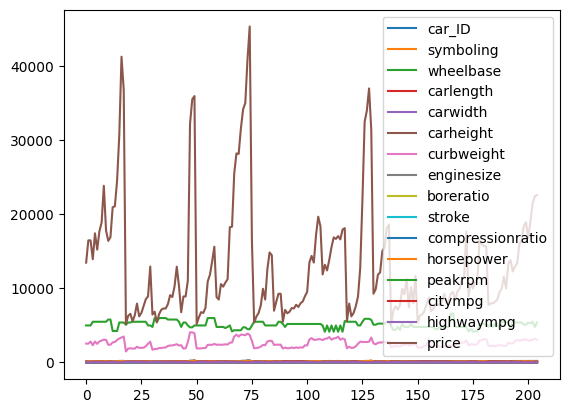

In [90]:
paper=plt.figure(figsize=[15,7])
cars.plot()
plt.show()

In [91]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [92]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

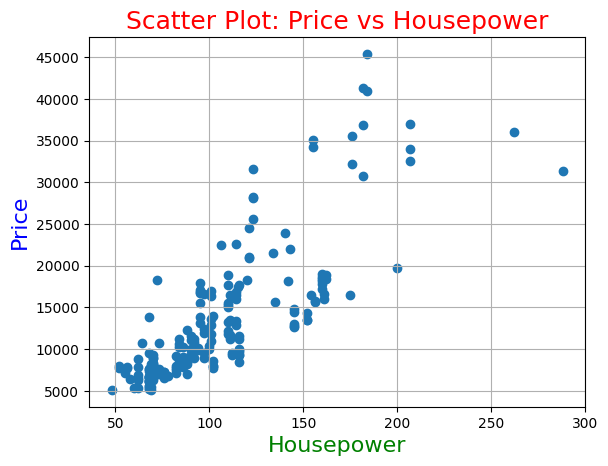

In [93]:

plt.scatter(cars['horsepower'], cars['price'])
plt.title('Scatter Plot: Price vs Housepower', size=18, color='r')
plt.xlabel('Housepower', size=16, color='g')
plt.ylabel('Price', size=16, color='b')
plt.grid(True)
plt.show()


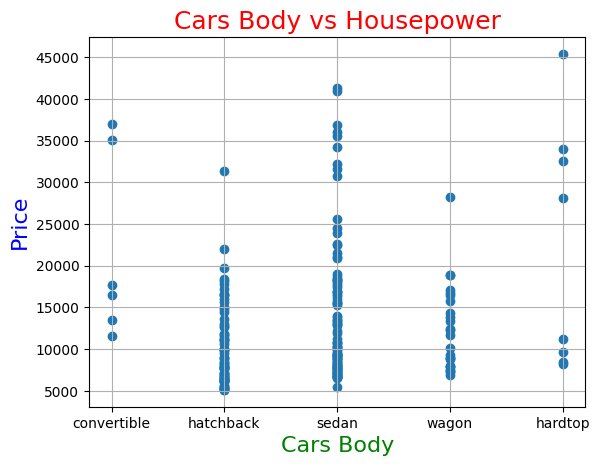

In [94]:
plt.scatter(cars['carbody'], cars['price'])
plt.title('Cars Body vs Housepower', size=18, color='r')
plt.xlabel('Cars Body', size=16, color='g')
plt.ylabel('Price', size=16, color='b')
plt.grid(True)
plt.show()


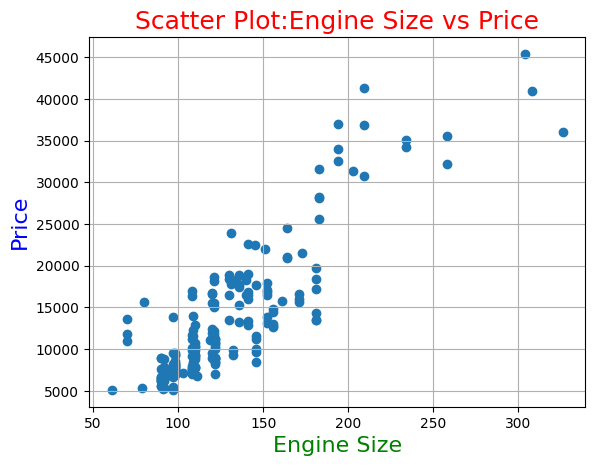

In [95]:

plt.scatter(cars['enginesize'], cars['price'])
plt.title('Scatter Plot:Engine Size vs Price', size=18, color='r')
plt.xlabel('Engine Size', size=16, color='g')
plt.ylabel('Price', size=16, color='b')
plt.grid(True)
plt.show()


<Axes: xlabel='symboling', ylabel='count'>

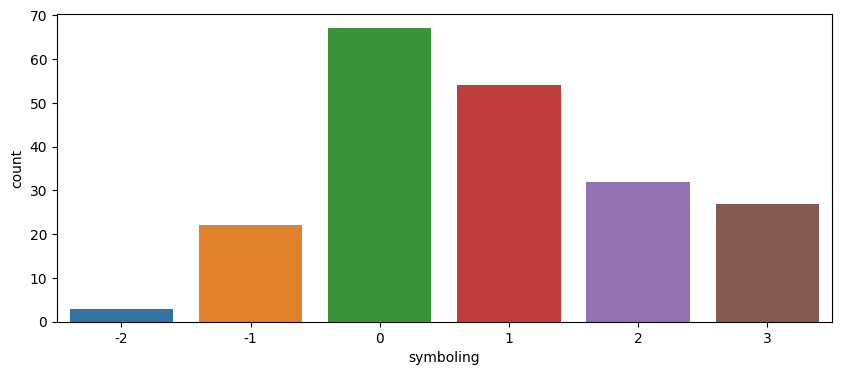

In [96]:
plt.figure(figsize = (10, 4))

sns.countplot(cars, x = 'symboling')

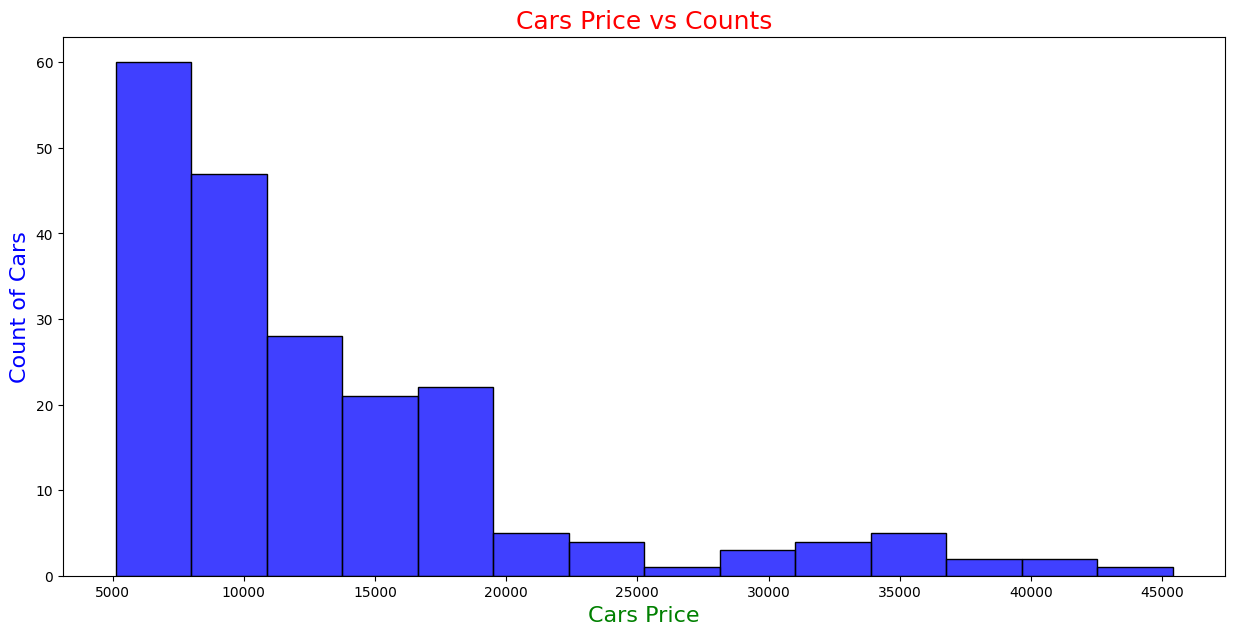

In [97]:
plt.figure(figsize = (15, 7))
plt.title('Cars Price vs Counts', size=18, color='r')
plt.xlabel('Cars Price', size=16, color='g')
plt.ylabel('Count of Cars', size=16, color='b')
sns.histplot(cars['price'], color='b')
plt.show()



In [98]:
drop_cols = ['symboling', 'fueltype', 'doornumber', 'enginelocation', 'fuelsystem', 'stroke', 'compressionratio']

cars.drop(columns = drop_cols, inplace = True)

## **5. Train Test Split**

In [99]:
x= cars.drop('price', axis=1)
y= cars['price']

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=6)


In [101]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming x, y are your features and target variable
# Example: x = df[['feature1', 'feature2']], y = df['target']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=6)

# Data preprocessing (one-hot encoding for categorical variables)
x_train_encoded = pd.get_dummies(x_train, drop_first=True)
x_test_encoded = pd.get_dummies(x_test, drop_first=True)

# Ensure both datasets have the same columns
common_columns = set(x_train_encoded.columns) & set(x_test_encoded.columns)
x_train_encoded = x_train_encoded[common_columns]
x_test_encoded = x_test_encoded[common_columns]

# Ensure y_train is numeric
y_train = pd.to_numeric(y_train)

# Create and train the model
model = LinearRegression()
model.fit(x_train_encoded, y_train)

# Make predictions
y_pred = model.predict(x_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 7071256.300805076
R-squared: 0.878193705272847


<ipython-input-101-19c8dc337e95>:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x_train_encoded = x_train_encoded[common_columns]
<ipython-input-101-19c8dc337e95>:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x_test_encoded = x_test_encoded[common_columns]


In [102]:

coefficients = pd.DataFrame({'Feature': x_train_encoded.columns, 'Coefficient': model.coef_})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)


print(coefficients)


                         Feature  Coefficient
49               enginetype_ohcf  7420.273518
22        CarName_toyota mark ii  4601.964324
45             CarName_mazda glc  3521.252743
11         CarName_toyota corona  2986.943960
15              CarName_bmw 320i  2842.882620
0                 drivewheel_rwd  2832.810485
16              aspiration_turbo  2824.458434
18                enginetype_ohc  2554.123914
42                CarName_bmw x3  2458.427720
2            CarName_volvo 264gl  1459.696680
26     CarName_plymouth fury iii  1368.751910
20        CarName_toyota corolla  1160.460034
6                       carwidth   870.814732
21        CarName_nissan clipper   742.185589
12           CarName_honda civic   733.402145
7              CarName_subaru dl   569.114096
4                      carheight   534.893204
31                    highwaympg   368.092867
37         CarName_mitsubishi g4   352.174199
47          CarName_nissan latio   341.328692
19           CarName_peugeot 504  

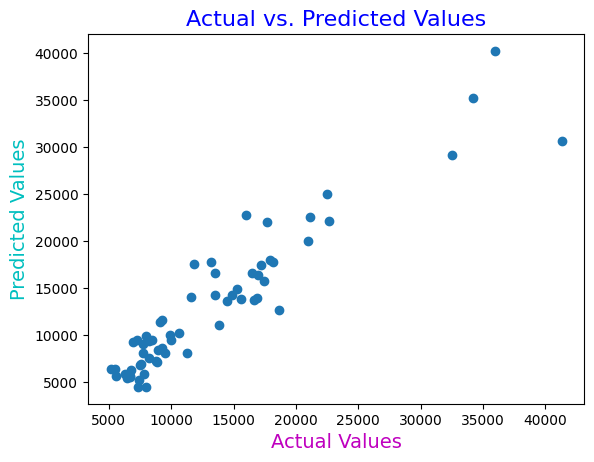

In [103]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values", size=14, color='m')
plt.ylabel("Predicted Values", size=14, color='c')
plt.title("Actual vs. Predicted Values", size=16, color='b')
plt.show()

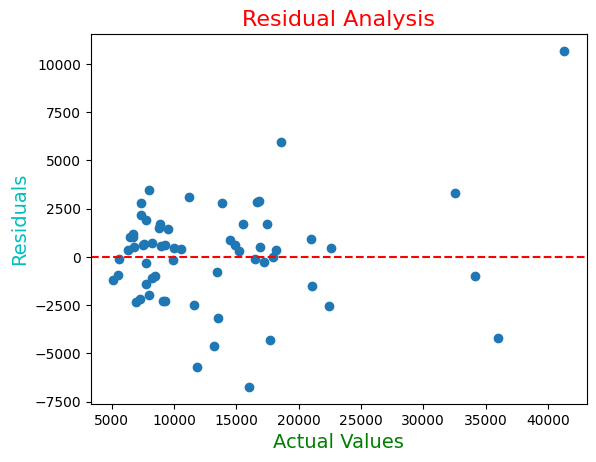

In [104]:

residuals = y_test - y_pred


plt.scatter(y_test, residuals)
plt.xlabel("Actual Values",size=14, color='g')
plt.ylabel("Residuals",size=14, color='c')
plt.title("Residual Analysis",size=16, color='r')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [105]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, x_train_encoded, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")

Cross-Validation Scores: [0.85815709 0.89178108 0.85319819 0.87398088 0.79855855]
Mean CV Score: 0.8551351580663559


In [106]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {'fit_intercept': [True, False], 'n_jobs': [None, -1], 'positive': [False, True]}

# Perform grid search
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid_search.fit(x_train_encoded, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'fit_intercept': True, 'n_jobs': None, 'positive': False}


## **7. Summary and Conclusion**

- There is a positive correlation between 'Price' and 'Horsepower', indicating that as the horsepower of a vehicle increases, its price tends to rise.

- There exists a positive relationship between 'Price' and 'Engine Size', suggesting that as the engine size of a vehicle increases, its price tends to increase as well.

- Vehicles with a 'Symboling' of 1 demonstrate the highest purchase rate, indicating that they are more likely to be purchased compared to those with other symboling values.

- Vehicles with lower prices exhibit a higher purchase rate, while those with higher prices show a lower purchase rate. This implies an inverse relationship between price and purchase rate – as prices decrease, the likelihood of purchase tends to increase, and vice versa.
-  Mean Squared Error (MSE) of 7071256.300805076 indicates a relatively high level of prediction error in the model.
- The strong R-squared value of 0.878 suggests a robust linear relationship between the actual and predicted prices, indicating the model's effectiveness in capturing and explaining the pricing patterns in the business data.
- The mean cross-validation score of 0.8551 reflects the overall reliability of the linear regression model in predicting the target variable, providing a stable estimate of its generalization performance.

